# Source Light Plot

In [18]:
import pickle
import numpy as np

names_f814w = ['J0602-4335', 'J0806+2006', 'J1620+1203', 'J2325-5229']

# LaTeX header
print("\\begin{table}[htb]")
print("\\centering")
print("\\caption{F814W best-fit \\textbf{source light} model parameters}")
print("\\label{tab:source_light_params_f814w}")
print("\\begin{tabular}lcccc}")
print("\\hline")
print("Lens System & $R_{\\text{S\\'ersic}}$ [arcsec] & $n_{\\text{S\\'ersic}}$ & $q$ \\\\")
print("\\hline")

for i, name in enumerate(names_f814w):
    filename = f"../../cutout_data/{name}/F814W/{name}_F814W.pkl"
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    chain_list = loaded_data.get('chain_list')
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list[1]

    param_names = ['R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0']
    indices = [param_mcmc.index(p) for p in param_names]

    r_chain = samples_mcmc[:, indices[0]]
    n_chain = samples_mcmc[:, indices[1]]
    e1_chain = samples_mcmc[:, indices[2]]
    e2_chain = samples_mcmc[:, indices[3]]

    e_chain = np.sqrt(e1_chain**2 + e2_chain**2)
    q_chain = (1 - e_chain) / (1 + e_chain)

    def get_median_and_uncertainties(samples):
        median = np.percentile(samples, 50)
        lower = median - np.percentile(samples, 16)
        upper = np.percentile(samples, 84) - median
        return median, lower, upper

    r_median, r_lower, r_upper = get_median_and_uncertainties(r_chain)
    n_median, n_lower, n_upper = get_median_and_uncertainties(n_chain)
    q_median, q_lower, q_upper = get_median_and_uncertainties(q_chain)

    # Print table row
    print(f"{name} & "
          f"${r_median:.3f}^{{+{r_upper:.3f}}}_{{-{r_lower:.3f}}}$ & "
          f"${n_median:.2f}^{{+{n_upper:.2f}}}_{{-{n_lower:.2f}}}$ & "
          f"${q_median:.2f}^{{+{q_upper:.2f}}}_{{-{q_lower:.2f}}}$ & \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{table}")


\begin{table}[htb]
\centering
\caption{F814W best-fit \textbf{source light} model parameters}
\label{tab:source_light_params_f814w}
\begin{tabular}lcccc}
\hline
Lens System & $R_{\text{S\'ersic}}$ [arcsec] & $n_{\text{S\'ersic}}$ & $q$ \\
\hline
J0602-4335 & $0.055^{+0.007}_{-0.004}$ & $0.58^{+0.09}_{-0.06}$ & $0.60^{+0.10}_{-0.06}$ & \\
J0806+2006 & $0.058^{+0.005}_{-0.004}$ & $0.58^{+0.11}_{-0.05}$ & $0.60^{+0.08}_{-0.06}$ & \\
J1620+1203 & $0.261^{+0.045}_{-0.036}$ & $1.93^{+0.06}_{-0.11}$ & $0.78^{+0.10}_{-0.11}$ & \\
J2325-5229 & $0.050^{+0.001}_{-0.000}$ & $0.52^{+0.04}_{-0.01}$ & $0.81^{+0.09}_{-0.10}$ & \\
\hline
\end{tabular}
\end{table}


-1.0951378721035685 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0951378721035685
-1.0591361002463537 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0591361002463542
-1.0827132505678423 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.082713250567842
-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


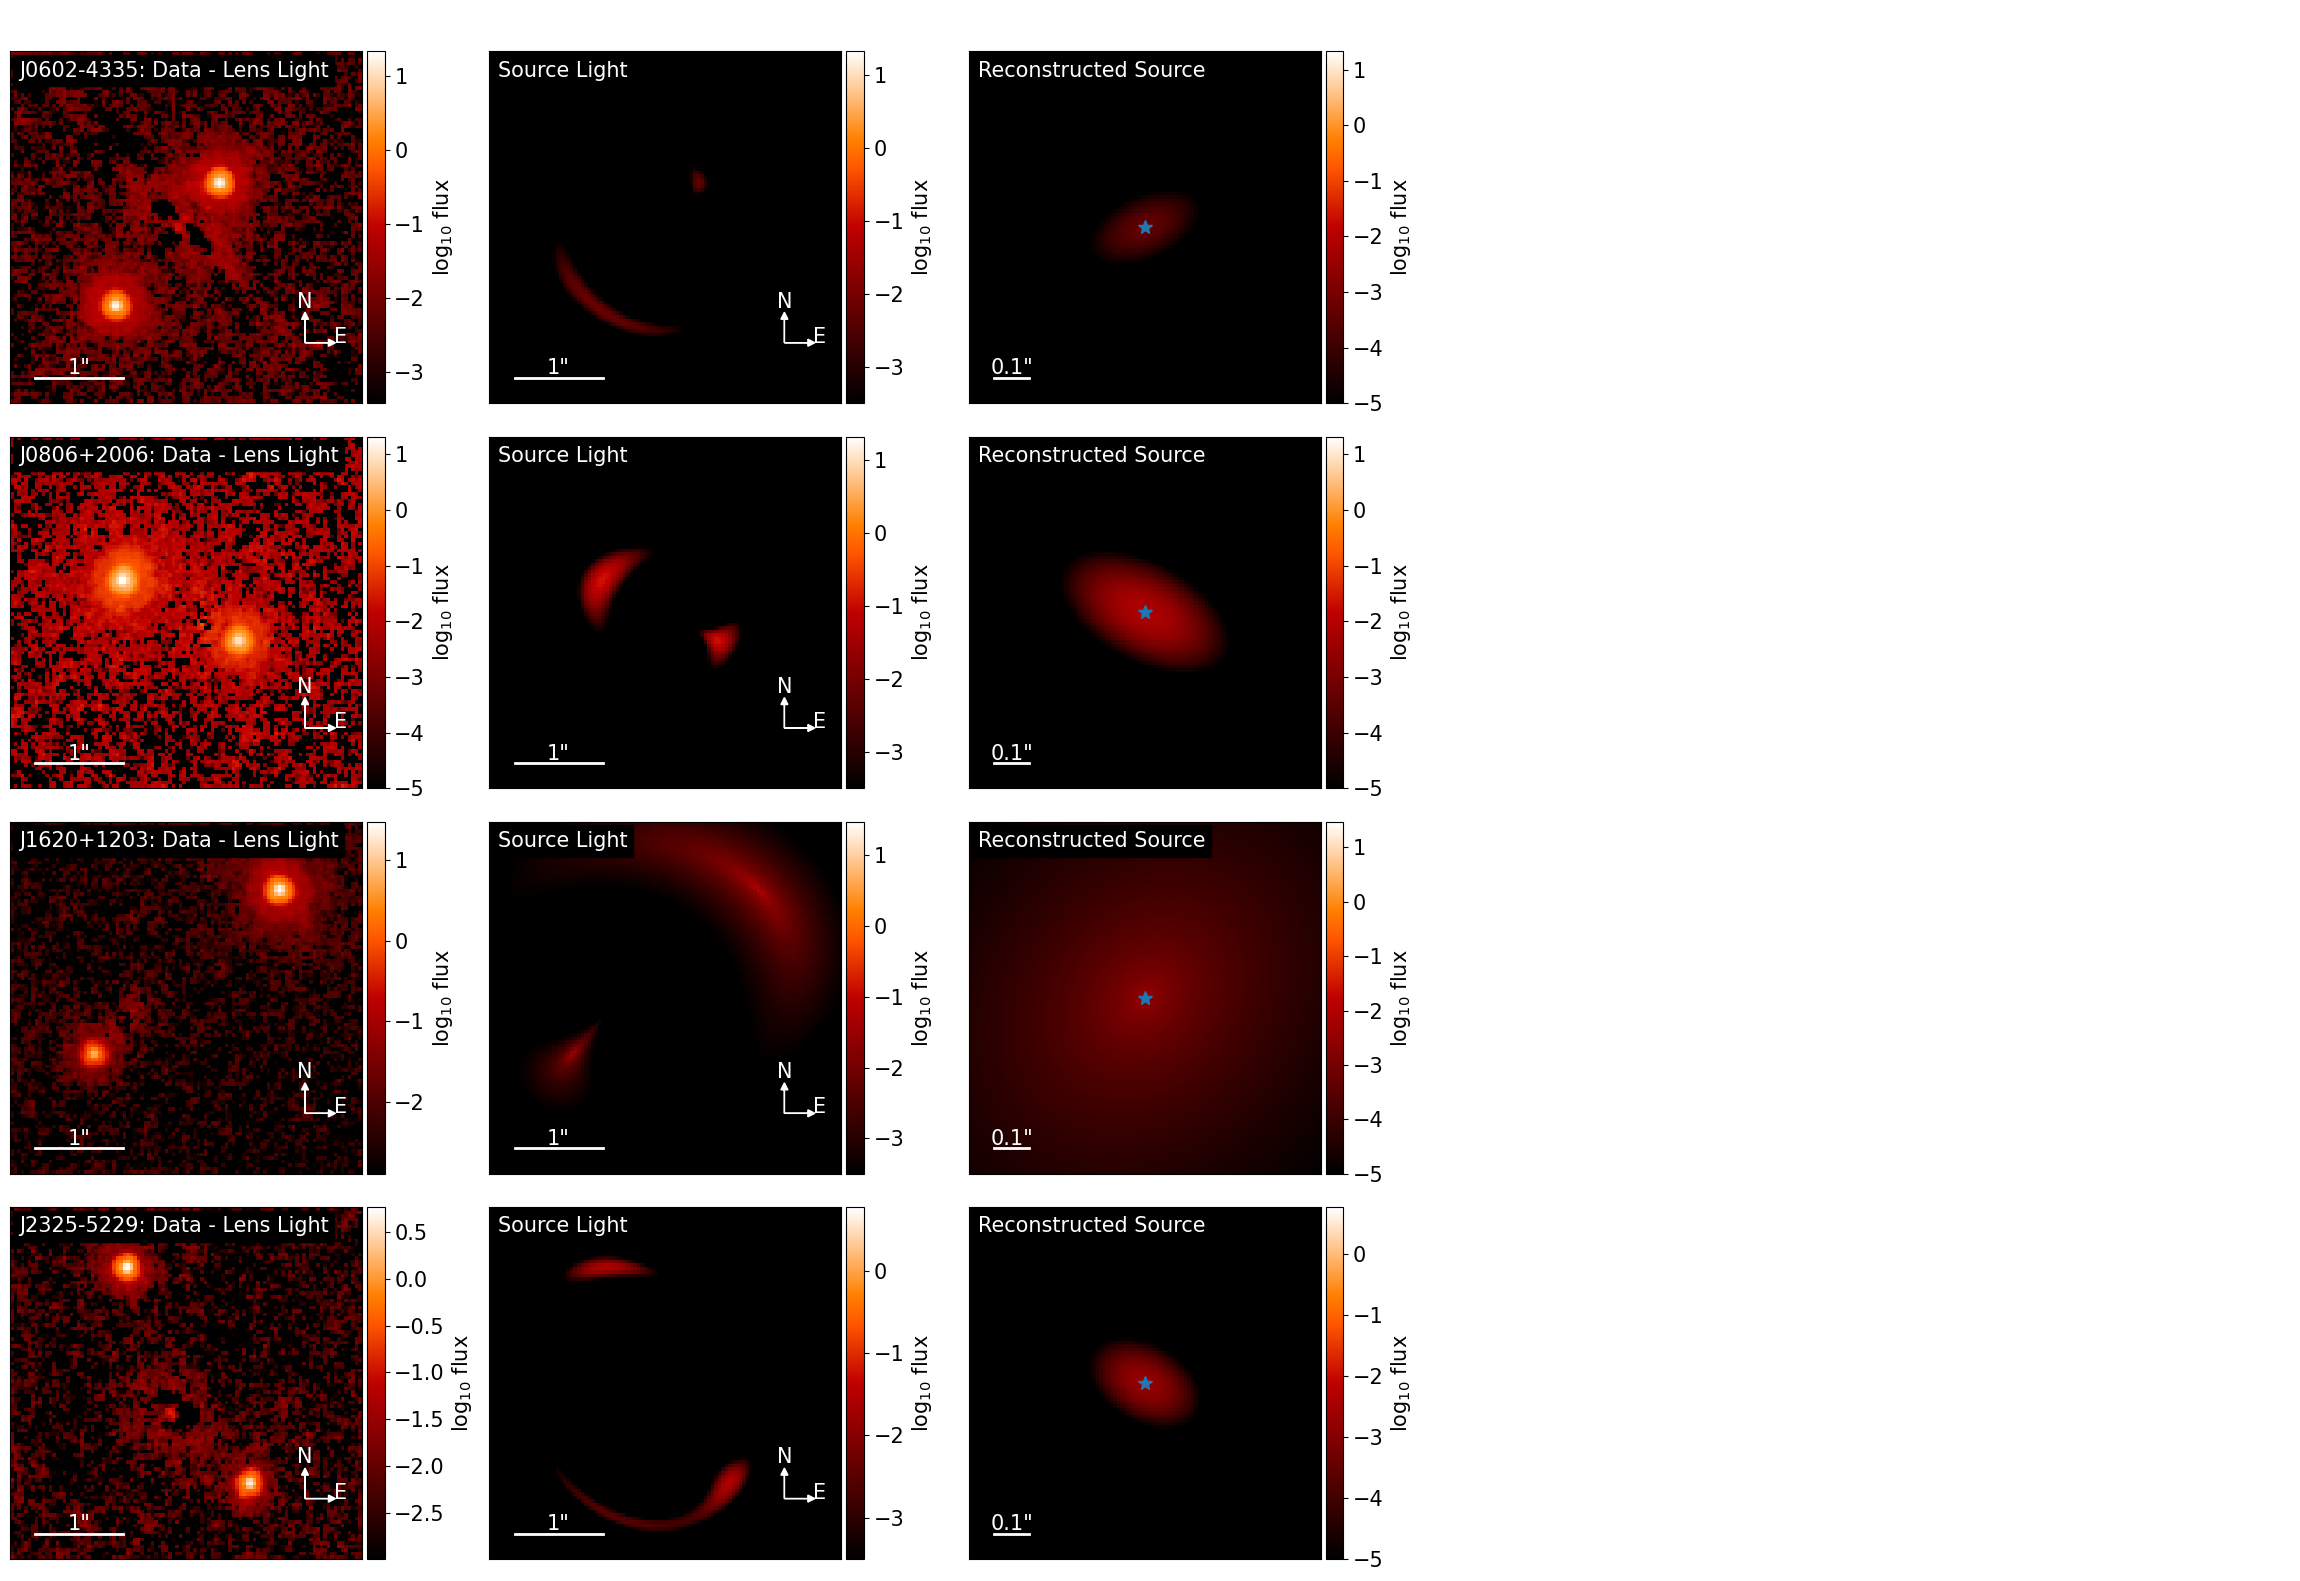

In [21]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
names = ['J0602-4335', 'J0806+2006', 'J1620+1203', 'J2325-5229'] 
filter = 'F814W'
fontsize = 14

nrows = len(names)
fig, axes = plt.subplots(nrows, 3, figsize=(20, 16))

for i, name in enumerate(names):
    filename = f"../../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

    # generate separate component plots
    modelPlot.decomposition_plot(
            ax=axes[i, 1], text="Source Light", source_add=True, unconvolved=True, v_min = -3.5
        )    
    modelPlot.source_plot(
            ax=axes[i, 2], text="Reconstructed Source", deltaPix_source=0.01, numPix=100, v_min = -5
        )    
    modelPlot.subtract_from_data_plot(
            ax=axes[i, 0], text=f"{name}: Data - Lens Light", lens_light_add=True
        )
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()
